In [2]:
import os, logging
import numpy as np
import torch as th
from Transformations import *
from BloodDataset import BloodDataset
from Data import get_datasets
from ExploratoryDataAnalysis import *
import utils

/Users/syntactic/miniconda3/envs/ModelingSynapticPlasticity/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [3]:
np.random.seed(0)
th.manual_seed(0)
logger = logging.getLogger('MSP_Project')
logging.basicConfig(level=logging.DEBUG)
logger.setLevel(logging.DEBUG)

in_colab = False
if os.getenv("COLAB_RELEASE_TAG"):
    in_colab = True
    logger.debug("Running in Colab")
USING_MNIST = False
device = utils.get_device()

train_set, test_set = get_datasets(in_colab, USING_MNIST)

DEBUG:MSP_Project:Data directory: ./full_dataset
DEBUG:MSP_Project:Using mean and std: tensor([0.9961]), tensor([0.0113])
/Users/syntactic/miniconda3/envs/ModelingSynapticPlasticity/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
DEBUG:MSP_Project:Trying to get a representative test set...
DEBUG:MSP_Project:93 images in training set before augmentation.
DEBUG:MSP_Project:465 images in training set.
DEBUG:MSP_Project:23 images in test set.


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/syntactic/miniconda3/envs/ModelingSynapticPlasticity/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/syntactic/miniconda3/envs/ModelingSynapticPlasticity/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/syntactic/miniconda3/envs/ModelingSynapticPlasticity/lib/python3.11/site-packages/ma

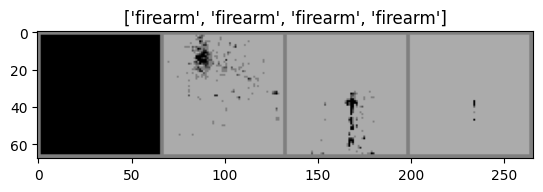

DEBUG:MSP_Project:Dataset classes:['blunt_trauma', 'firearm']
DEBUG:MSP_Project:Class Counts: [245, 220]


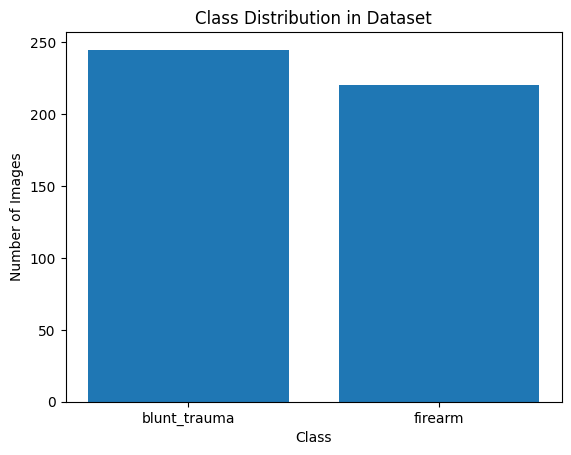

In [4]:
run_eda(train_set)

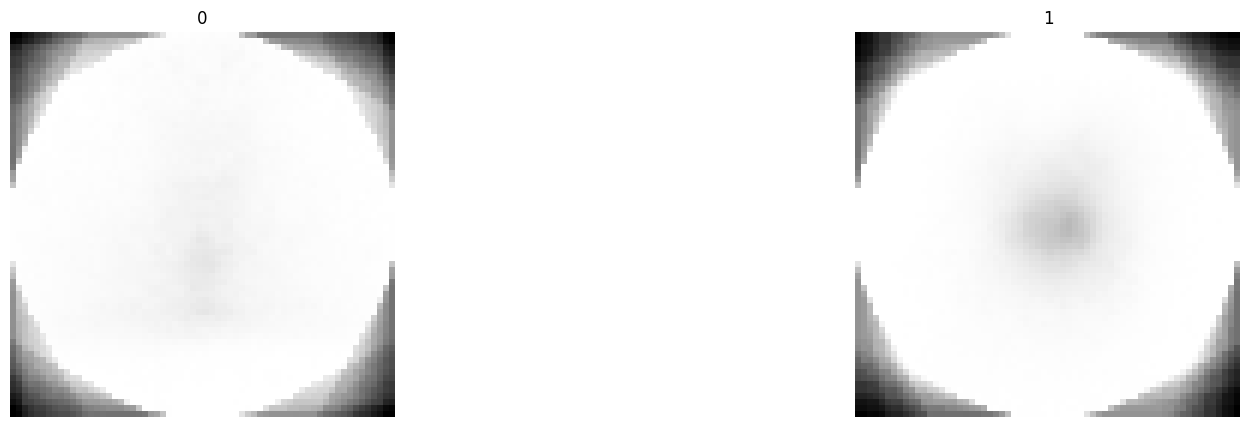

In [5]:
calculate_class_average(train_set)

FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting testing
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting testing
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting

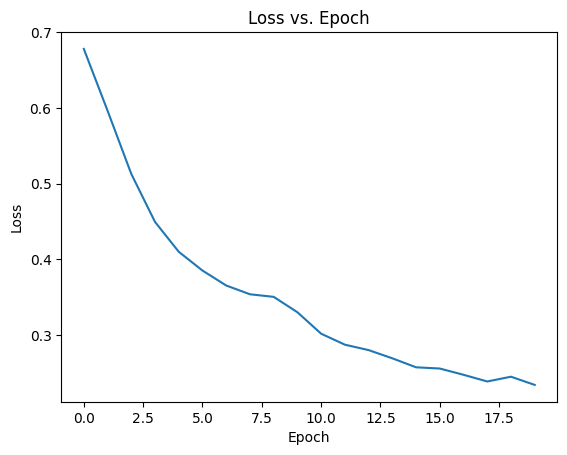

In [11]:
from TrainingTesting import k_fold_cross_validation
from Models import *
from plotting import plot_loss

model = SpikingCNN(beta=0.8, num_steps=25, using_mnist=USING_MNIST)
model = PyTorchCNN(using_mnist=USING_MNIST)
model = model.to(device)
optimizer = th.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
accuracy, loss_record = k_fold_cross_validation(train_set, model, k=5, num_epochs=10, batch_size=32, optimizer=optimizer)
smoothed_loss_record = utils.smooth_k_fold_loss_record(loss_record)
plot_loss(smoothed_loss_record)